In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import sklearn.metrics as metrics

In [67]:
!pwd

/Users/abhijithroy/Public/Projects/H1N1andSeasonalV


In [68]:
os.listdir('./')

['training_set_labels.csv',
 'submission1.csv',
 'H1N1predictor.ipynb',
 'submission_format.csv',
 'submission2.csv',
 'training_set_features.csv',
 'run2.ipynb',
 '.ipynb_checkpoints',
 'test_set_features.csv']

In [101]:
# reading data

train_features = pd.read_csv('training_set_features.csv')
train_targets = pd.read_csv('training_set_labels.csv')
submission_form = pd.read_csv('submission_format.csv')

In [181]:
test_data = pd.read_csv('test_set_features.csv')

In [102]:
train_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [103]:
numeric_cols = [col for col, value in train_features.dtypes.items() if value != 'object']
non_numeric_cols = [col for col, value in train_features.dtypes.items() if value == 'object']

In [104]:
train_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [105]:
def apply_mapping(df, cols):
    dict_mapping = {
        "income_poverty" : {
            'Below Poverty' : 0,
            '> $75,000' : 1,
            '<= $75,000, Above Poverty' : 2
        },
        "marital_status" : {
            'Married' : 1,
            'Not Married' : 0
        },
        "rent_or_own" : {
            "Own" : 1,
            "Rent" : 0
        },
        "education" : {
            '< 12 Years':1,
            '12 Years':2,
            'Some College':3,
            'College Graduate':4
        },
        "employment_status" : {
            'Unemployed':1, 
            'Not in Labor Force':2, 
            'Employed':3
        },
    }
    for col in cols:
        mapping_values = dict_mapping[col]
        df[col] = df[col].map(mapping_values)
    return df


In [106]:
# age_group, education, race gets non ordinal encoding using pd.get_dummies
# train_features = pd.get_dummies(train_features, columns=['age_group', 'education', 'race', 'employment_status'], drop_first=True)
train_features = apply_mapping(train_features, ['income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'education'])

In [107]:
train_features[['income_poverty', 'marital_status', 'rent_or_own', 'education', 'employment_status']]

,income_poverty,marital_status,rent_or_own,education,employment_status
0,0.0,0.0,1.0,1.0,2.0
1,0.0,0.0,0.0,2.0,3.0
2,2.0,0.0,1.0,4.0,3.0
3,0.0,0.0,0.0,2.0,2.0
4,2.0,1.0,1.0,3.0,3.0
...,...,...,...,...,...
26702,2.0,0.0,1.0,3.0,2.0
26703,2.0,0.0,0.0,4.0,3.0
26704,NaN,0.0,1.0,3.0,NaN
26705,2.0,1.0,0.0,3.0,3.0


In [108]:
train_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                      float64
race                            object
sex                      

In [142]:
freq_cols = ['employment_status', 'health_insurance', 'income_poverty', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'rent_or_own', 'marital_status', 'education', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective', 'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'household_adults', 'household_children', 'behavioral_avoidance', 'behavioral_touch_face', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds', 'behavioral_wash_hands', 'behavioral_face_mask']
for col in freq_cols: #only other thing would be to try and do median for some columns. not sure if iy would make a diff.
    freq_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #this is a hyperparam we can tune 
    temp = freq_imp.fit_transform(train_features[[col]]).ravel()
    train_features[col] = temp

In [143]:
# label encoding age_group, sex, race, census_msa, 
temp_df = train_features[['age_group', 'sex', 'race', 'census_msa', 'hhs_geo_region', 'employment_industry', 'employment_occupation']].copy()
for col in temp_df.columns.tolist():
    label_enc = LabelEncoder()
    temp_df[col] = label_enc.fit_transform(temp_df[col])

train_features.drop(columns=['age_group', 'race', 'sex', 'census_msa', 'hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace=True)
train_features = pd.concat([temp_df, train_features], axis=1)

train_features.head()

,age_group,sex,race,census_msa,hhs_geo_region,employment_industry,employment_occupation,respondent_id,h1n1_concern,h1n1_knowledge,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,3,0,3,2,8,21,23,0,1.0,0.0,...,2.0,1.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
1,1,1,3,0,1,12,19,1,3.0,2.0,...,4.0,2.0,4.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
2,0,1,3,0,9,14,21,2,1.0,1.0,...,4.0,1.0,2.0,4.0,2.0,0.0,1.0,3.0,2.0,0.0
3,4,0,3,1,5,21,23,3,1.0,1.0,...,5.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
4,2,0,3,0,9,18,5,4,2.0,1.0,...,3.0,1.0,4.0,3.0,2.0,1.0,1.0,3.0,1.0,0.0


In [110]:
# train_features['employment_occupation'].fillna('other', inplace=True)
# train_features['employment_industry'].fillna('other', inplace=True)

In [144]:
train_features.isnull().sum().sort_values(ascending=False)

age_group                      0
sex                            0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
education                      0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
household_adults               0
chronic_med_condition          0
doctor_recc_seasonal           0
doctor_recc_h1n1               0
h1n1_concern                   0
race                           0
census_msa                     0
hhs_geo_region                 0
employment_industry            0
employment_occupation          0
respondent_id                  0
h1n1_knowledge                 0
behavioral_touch_face          0
behavioral_antiviral_meds      0
behavioral

In [145]:
train_targets.set_index('respondent_id')
train_features.set_index('respondent_id')
df_train = pd.merge(train_features, train_targets, on='respondent_id', how='inner')

In [146]:
df_train.columns

Index(['age_group', 'sex', 'race', 'census_msa', 'hhs_geo_region',
       'employment_industry', 'employment_occupation', 'respondent_id',
       'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [147]:
X, y = df_train.loc[:, :'household_children'].copy(), df_train.loc[:, 'h1n1_vaccine':].copy()

In [148]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.33, shuffle=True, stratify=y)

In [149]:
scaler = MinMaxScaler() #scales between 0 and 1, so it is suitable for this data. SS makes values negative.
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [150]:
def plot_roc(y_true, y_score, label_name, ax, color=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    if color:
        ax.set_facecolor('lightblue')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {metrics.roc_auc_score(y_true, y_score):.4f}"
    )

Running Model: Logistic Regression
Accuracy Score for Logistic Regression:  0.6638302700249603
Hamming Loss for Logistic Regression:  0.19571136827773997

Running Model: RandomForest Classifier
Accuracy Score for RandomForest Classifier:  0.6766507828454731
Hamming Loss for RandomForest Classifier:  0.1879963694122986

Running Model: AdaBoost Classifier
Accuracy Score for AdaBoost Classifier:  0.6683685046516905
Hamming Loss for AdaBoost Classifier:  0.19236442024052644

Running Model: ExtraTrees Classifier
Accuracy Score for ExtraTrees Classifier:  0.6717721806217382
Hamming Loss for ExtraTrees Classifier:  0.19179714091218517

Running Model: Support Vector Machine
Accuracy Score for Support Vector Machine:  0.6660993873383254
Hamming Loss for Support Vector Machine:  0.19610846380757885



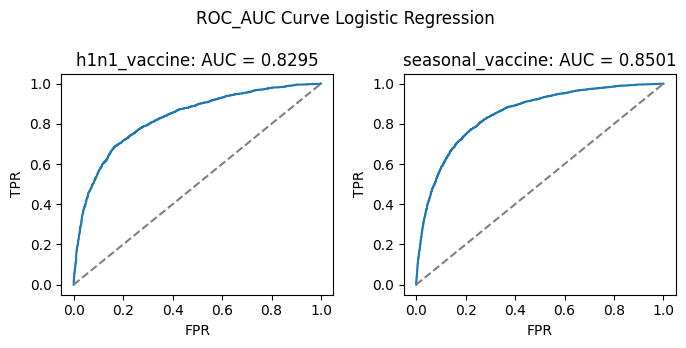

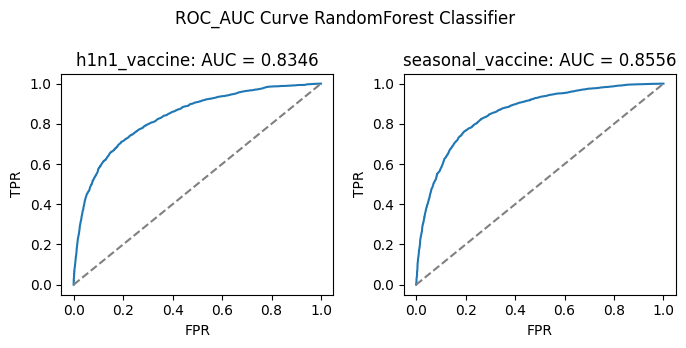

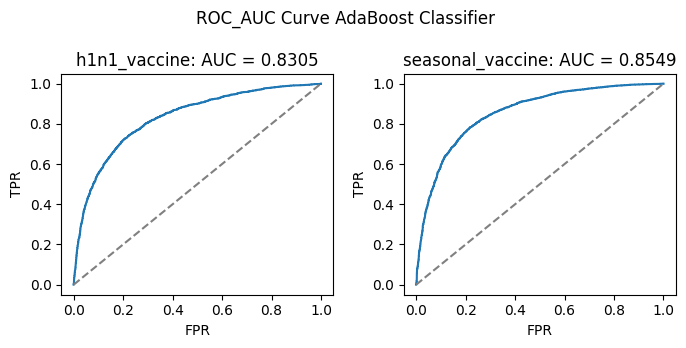

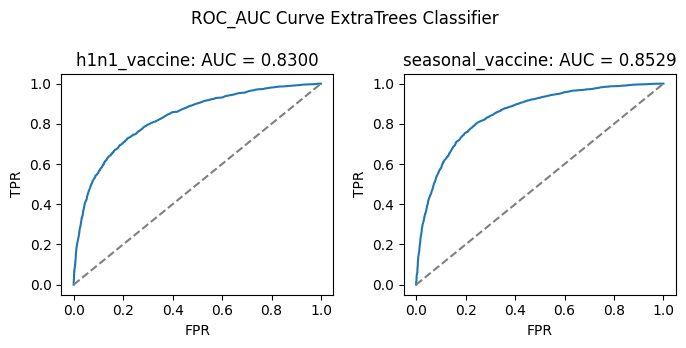

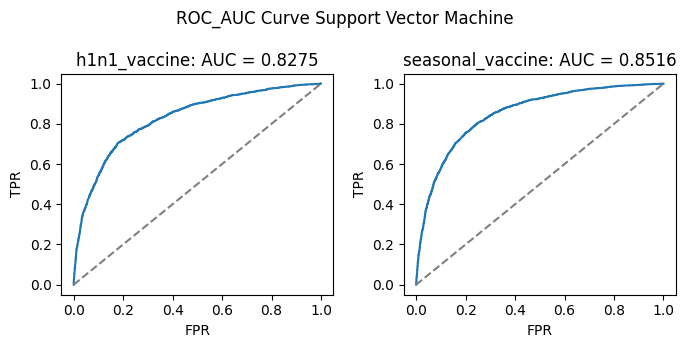

In [151]:
models = [('Logistic Regression', LogisticRegression(penalty = 'l2', C=0.1, solver='liblinear')),
          ('RandomForest Classifier', RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)), ('AdaBoost Classifier', AdaBoostClassifier(n_estimators=1000, learning_rate=1.0)),
          ('ExtraTrees Classifier', ExtraTreesClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)), ('Support Vector Machine', SVC(kernel='linear', C=0.1, probability=True))]

for name, model in models:
    print(f"Running Model: {name}")
    # preprocessing_steps = Pipeline([
    #     ('minmax_scaler', MinMaxScaler()),
    #     ('simple_imputer', SimpleImputer(strategy='median')),
    #     ])
    
    # preprocessor = ColumnTransformer(
    #     transformers = [
    #         ("numeric", preprocessing_steps, numeric_cols)
    #     ],
    #     remainder = "drop"
    # )
    
    clf = MultiOutputClassifier(estimator=model)
    # clf = Pipeline([
    #     ("preprocessor", preprocessor),
    #     ("estimators", clf),
    # ])
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    y_preds = clf.predict_proba(X_val)
    y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_val.index)

    fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
    plt.suptitle(f"ROC_AUC Curve {name}")

    plot_roc(y_val['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
    plot_roc(y_val['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
    fig.tight_layout()
    
    print(f"Accuracy Score for {name}: ", metrics.accuracy_score(y_val, preds))
    print(f"Hamming Loss for {name}: ", metrics.hamming_loss(y_val, preds))
    print() 

In [157]:
# can try nn with tensorflow and xgboost but for now choosing random forest classifier as model
model = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
clf = MultiOutputClassifier(estimator=model)
clf.fit(X_train, y_train)
    
preds = clf.predict(X_val)
y_preds = clf.predict_proba(X_val)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_val.index)

In [155]:
# model = AdaBoostClassifier(n_estimators=1000, learning_rate=1.0)
# clf = MultiOutputClassifier(estimator=model)
# clf.fit(X_train, y_train)
    
# preds = clf.predict(X_val)
# y_preds = clf.predict_proba(X_val)
# y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_val.index)

In [156]:
# metrics.roc_auc_score(y_val, y_preds_both)

0.8426855688214328

In [158]:
metrics.roc_auc_score(y_val, y_preds_both) # for randomforest

0.845573450841089

In [167]:
def create_test_transform(df):
    df = apply_mapping(df, ['income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'education'])
    for col in freq_cols: #only other thing would be to try and do median for some columns. not sure if iy would make a diff.
        freq_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #this is a hyperparam we can tune 
        temp = freq_imp.fit_transform(df[[col]]).ravel()
        df[col] = temp
    
    temp_df = df[['age_group', 'sex', 'race', 'census_msa', 'hhs_geo_region', 'employment_industry', 'employment_occupation']].copy()
    
    for col in temp_df.columns.tolist():
        label_enc = LabelEncoder()
        temp_df[col] = label_enc.fit_transform(temp_df[col])

    df.drop(columns=['age_group', 'race', 'sex', 'census_msa', 'hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace=True)
    df = pd.concat([temp_df, df], axis=1)
    # df = scaler.fit_transform(df)
    return df


In [186]:
test_data = create_test_transform(test_data)

In [187]:
test_data.dtypes


age_group                        int64
sex                              int64
race                             int64
census_msa                       int64
hhs_geo_region                   int64
employment_industry              int64
employment_occupation            int64
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_va

In [180]:
test_data.shape

(26708, 36)

In [171]:
test_probs = clf.predict_proba(test_data)
test_probs

[array([[0.812, 0.188],
        [0.889, 0.111],
        [0.528, 0.472],
        ...,
        [0.83 , 0.17 ],
        [0.882, 0.118],
        [0.553, 0.447]]),
 array([[0.68 , 0.32 ],
        [0.915, 0.085],
        [0.2  , 0.8  ],
        ...,
        [0.69 , 0.31 ],
        [0.645, 0.355],
        [0.399, 0.601]])]

In [175]:
test_probs[0].shape, test_probs[1].shape

((26708, 2), (26708, 2))

In [177]:
submission_form.set_index('respondent_id')

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7
...,...,...
53410,0.5,0.7
53411,0.5,0.7
53412,0.5,0.7


In [182]:
test_preds_df = pd.DataFrame({
    "h1n1_vaccine" : test_probs[0][:, 1],
    "seasonal_vaccine" : test_probs[1][:, 1]
},
    index = test_data.index,
                         )
test_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
0,0.188,0.320
1,0.111,0.085
2,0.472,0.800
3,0.628,0.881
4,0.315,0.495


In [184]:
np.testing.assert_array_equal(test_data.index.values, 
                              submission_form.index.values)

# Save predictions to submission data frame
submission_form["h1n1_vaccine"] = test_probs[0][:, 1]
submission_form["seasonal_vaccine"] = test_probs[1][:, 1]

submission_form.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.188,0.320
1,26708,0.111,0.085
2,26709,0.472,0.800
3,26710,0.628,0.881
4,26711,0.315,0.495


In [185]:
submission_form.to_csv('./submission3.csv', index=False)

In [170]:
test_data = scaler.fit_transform(test_data)

In [34]:
# dropping hhsgeo_regio, census_msa
train_features = train_features.drop(columns = ['employment_industry', 'employment_occupation'], axis=1)

In [35]:
print(train_features.columns)
print(train_features.shape)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White',
       'employment_sta

In [36]:
train_features.dtypes

respondent_id                             int64
h1n1_concern                            float64
h1n1_knowledge                          float64
behavioral_antiviral_meds               float64
behavioral_avoidance                    float64
behavioral_face_mask                    float64
behavioral_wash_hands                   float64
behavioral_large_gatherings             float64
behavioral_outside_home                 float64
behavioral_touch_face                   float64
doctor_recc_h1n1                        float64
doctor_recc_seasonal                    float64
chronic_med_condition                   float64
child_under_6_months                    float64
health_worker                           float64
health_insurance                        float64
opinion_h1n1_vacc_effective             float64
opinion_h1n1_risk                       float64
opinion_h1n1_sick_from_vacc             float64
opinion_seas_vacc_effective             float64
opinion_seas_risk                       

In [39]:
train_targets.set_index('respondent_id')
train_features.set_index('respondent_id')
df_train = pd.merge(train_features, train_targets, on='respondent_id', how='inner')

In [41]:
df_train.shape

(26707, 42)

In [49]:
train_features.isnull().sum()

respondent_id                               0
h1n1_concern                               92
h1n1_knowledge                            116
behavioral_antiviral_meds                  71
behavioral_avoidance                      208
behavioral_face_mask                       19
behavioral_wash_hands                      42
behavioral_large_gatherings                87
behavioral_outside_home                    82
behavioral_touch_face                     128
doctor_recc_h1n1                         2160
doctor_recc_seasonal                     2160
chronic_med_condition                     971
child_under_6_months                      820
health_worker                             804
health_insurance                        12274
opinion_h1n1_vacc_effective               391
opinion_h1n1_risk                         388
opinion_h1n1_sick_from_vacc               395
opinion_seas_vacc_effective               462
opinion_seas_risk                         514
opinion_seas_sick_from_vacc       

In [48]:
# imputing missing values
imputer = SimpleImputer(strategy="median")
imputer.fit(train_features)
simple_np_array = imputer.transform(train_features)
train_features_imputed = pd.DataFrame(simple_np_array, columns=train_features.columns)
train_features_imputed.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,employment_status_Not in Labor Force,employment_status_Unemployed
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# train_features_imputed_poly = poly.fit_transform(train_features_imputed)
# df_poly_viz = pd.DataFrame(train_features_imputed_poly, columns=poly.get_feature_names_out(train_features_imputed.columns))
# df_poly_viz.head()
# ### 820 columns for polynomial features, honestly hard to interpret whats goin on, so going to keep that aside for now
# del poly, train_features_imputed_poly, df_poly_viz

In [61]:
# test train split
X_train, y_train, X_val, y_val = train_test_split(train_features, train_targets, test_size=0.33, shuffle=True, random_state=42)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(17893, 40)
(8814, 40)
(17893, 3)
(8814, 3)


In [64]:
X_train.isnull().sum().sort_values(ascending=False)

health_insurance                        8290
income_poverty                          2907
doctor_recc_h1n1                        1466
doctor_recc_seasonal                    1466
rent_or_own                             1364
marital_status                           932
chronic_med_condition                    638
child_under_6_months                     535
health_worker                            529
opinion_seas_sick_from_vacc              360
opinion_seas_risk                        338
opinion_seas_vacc_effective              303
opinion_h1n1_vacc_effective              264
opinion_h1n1_sick_from_vacc              261
opinion_h1n1_risk                        257
household_adults                         173
household_children                       173
behavioral_avoidance                     140
behavioral_touch_face                     80
h1n1_knowledge                            80
behavioral_large_gatherings               61
h1n1_concern                              58
behavioral